In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crackforest/Images/029.jpg
/kaggle/input/crackforest/Images/014.jpg
/kaggle/input/crackforest/Images/109.jpg
/kaggle/input/crackforest/Images/034.jpg
/kaggle/input/crackforest/Images/024.jpg
/kaggle/input/crackforest/Images/033.jpg
/kaggle/input/crackforest/Images/094.jpg
/kaggle/input/crackforest/Images/049.jpg
/kaggle/input/crackforest/Images/048.jpg
/kaggle/input/crackforest/Images/115.jpg
/kaggle/input/crackforest/Images/080.jpg
/kaggle/input/crackforest/Images/062.jpg
/kaggle/input/crackforest/Images/118.jpg
/kaggle/input/crackforest/Images/067.jpg
/kaggle/input/crackforest/Images/106.jpg
/kaggle/input/crackforest/Images/113.jpg
/kaggle/input/crackforest/Images/006.jpg
/kaggle/input/crackforest/Images/066.jpg
/kaggle/input/crackforest/Images/011.jpg
/kaggle/input/crackforest/Images/002.jpg
/kaggle/input/crackforest/Images/036.jpg
/kaggle/input/crackforest/Images/069.jpg
/kaggle/input/crackforest/Images/089.jpg
/kaggle/input/crackforest/Images/025.jpg
/kaggle/input/cr

In [2]:
from PIL import Image
image = Image.open('../input/crackforest/Masks/001_label.PNG')

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

PNG
(480, 320)
L


In [3]:
import numpy as np
arr = np.asarray(image)
arr.shape

(320, 480)

In [4]:
from PIL import Image
image = Image.open('../input/crackforest/Images/001.jpg')

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(480, 320)
RGB


In [5]:
import numpy as np
arr = np.asarray(image)
arr.shape

(320, 480, 3)

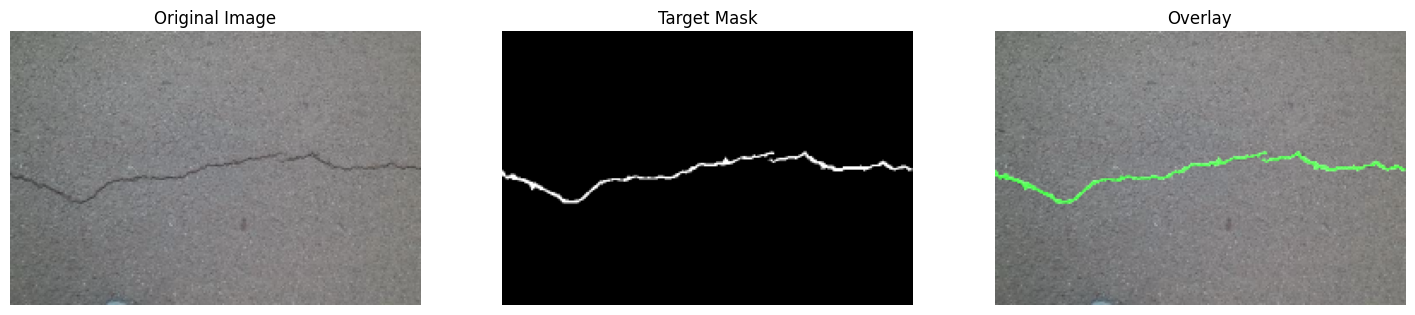

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to resize and convert PNG mask to binary
def preprocess_mask(target_mask_path, target_shape):

    # Load the mask image
    mask = cv2.imread(target_mask_path, cv2.IMREAD_UNCHANGED)
#     print(mask.shape)

#     Resize the mask to the target shape
    mask = cv2.resize(mask, (target_shape[1], target_shape[0]))

    # Extract the alpha channel (assuming it contains the mask)
#     alpha_channel = mask[:, :, 3]

    # Create a 3-channel mask
#     rgb_mask = cv2.merge([alpha_channel, alpha_channel, alpha_channel])

    # Assuming target_mask is your mask array
#     _, binary_mask = cv2.threshold(rgb_mask, 1, 255, cv2.THRESH_BINARY)

#     mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Normalize to 0 and 1
#     binary_mask = binary_mask / 255.0
    mask = mask / 255.0

    return mask

# Function to load and preprocess original and target images
def load_data(original_path, target_path, target_shape):
    # print(original_path)
    
    # Convert TensorFlow tensor to string
#     original_path = tf.io.read_file(original_path)
#     target_path = tf.io.read_file(target_path)
        
    # Read the original image
    original_image = cv2.imread(original_path)

#     Resize the original image to the target shape
    original_image = cv2.resize(original_image, (target_shape[1], target_shape[0]))

    # Normalize pixel values to the range [0, 1]
    original_image = original_image / 255.0

    # Read and preprocess the target mask
    target_mask = preprocess_mask(target_path, target_shape)

    return original_image, target_mask

# Function to overlay the mask on the original image
def overlay_mask(original_image, target_mask):
    # Create a copy of the original image
    overlay_image = original_image.copy()

    # Convert the mask to a 3-channel image
    mask_rgb = np.stack([target_mask] * 3, axis=-1)

    # Set the overlay color (here, using green)
    overlay_color = np.array([0, 1, 0])  # [B, G, R]

    # Apply the mask overlay
    overlay_image = overlay_image + (overlay_color * mask_rgb)

    # Clip values to be in the valid range [0, 1]
    overlay_image = np.clip(overlay_image, 0, 1)

    return overlay_image

# Function to visualize the original image, target mask, and overlay
def visualize(original_image, target_mask, overlay_image):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display the original image
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display the target mask
    axes[1].imshow(target_mask, cmap='gray')
    axes[1].set_title('Target Mask')
    axes[1].axis('off')

    # Display the overlay
    axes[2].imshow(overlay_image)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()

# Example usage
original_image_path = "../input/crackforest/Images/001.jpg"
target_mask_path = "../input/crackforest/Masks/001_label.PNG"
target_shape = (160, 240)

# Load and preprocess the data
original_image, target_mask = load_data(original_image_path, target_mask_path, target_shape)

# Overlay the mask on the original image
overlay_image = overlay_mask(original_image, target_mask)

# Visualize the original image, target mask, and overlay
visualize(original_image, target_mask, overlay_image)


In [7]:
np.unique(target_mask)

array([0.        , 0.25098039, 0.50196078, 0.74901961, 1.        ])

In [8]:
import tensorflow as tf
originals = []
masks = []
Images = '../input/crackforest/Images/'
Masks = '../input/crackforest/Masks/'
target_shape = (160, 240)
for img_path, mask_path in zip(sorted(os.listdir(Images)), sorted(os.listdir(Masks))):
#     print(img_path, mask_path)
    img, mask = load_data(os.path.join(Images, img_path), os.path.join(Masks, mask_path), target_shape)
    originals.append(img)
    masks.append(mask)
# image_paths = [os.path.join(Images, img_path) for img_path in sorted(os.listdir(Images))]
# mask_paths = [os.path.join(Masks, mask_path) for mask_path in sorted(os.listdir(Masks))]
# train_dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
# train_dataset = train_dataset.map(lambda x, y: (load_data(x, y)))
# train_dataset = train_dataset.batch(8)

2024-05-04 08:38:48.043593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 08:38:48.043701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 08:38:48.145719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
masks = np.array(masks)
masks = (masks > 0.5).astype(np.float32)
originals = np.array(originals)
masks.shape, originals.shape

((118, 160, 240), (118, 160, 240, 3))

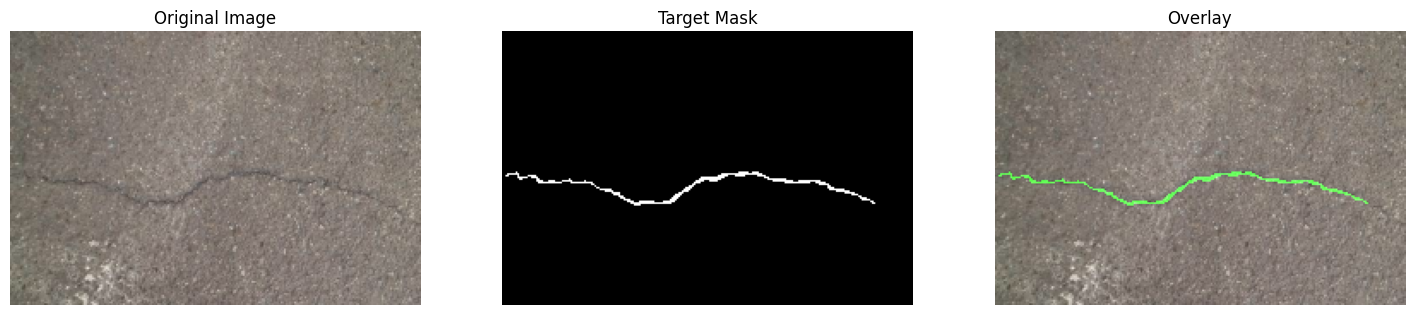

In [10]:
id = 69

original_image = originals[id]
target_mask = masks[id]

# Overlay the mask on the original image
overlay_image = overlay_mask(original_image, target_mask)

# Visualize the original image, target mask, and overlay
visualize(original_image, target_mask, overlay_image)

In [11]:
np.unique(masks)

array([0., 1.], dtype=float32)

In [12]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Get the total number of images
total_images = originals.shape[0]

# Randomly shuffle indices
shuffled_indices = np.random.permutation(total_images)

# Define the number of images for training and testing
num_train = int(total_images * 0.75)  # 75% for training
num_test = total_images - num_train

# Split the indices
train_indices = shuffled_indices[:num_train]
test_indices = shuffled_indices[num_train:]

# Use the indices to get the training and testing sets
train_originals = originals[train_indices]
test_originals = originals[test_indices]
train_masks = masks[train_indices]
test_masks = masks[test_indices]

# Print the shapes to verify the split
print("Train Originals Shape:", train_originals.shape)
print("Test Originals Shape:", test_originals.shape)
print("Train Masks Shape:", train_masks.shape)
print("Test Masks Shape:", test_masks.shape)

Train Originals Shape: (88, 160, 240, 3)
Test Originals Shape: (30, 160, 240, 3)
Train Masks Shape: (88, 160, 240)
Test Masks Shape: (30, 160, 240)


In [13]:
# !pip install --upgrade pip
# !pip install tf-models-official==2.8.0
# !pip install tensorflow tensorflow-addons# 
# !pip uninstall tensorflow
# !pip install tensorflow==2.8.0

In [14]:
# import tensorflow as tf
# tf.__version__

In [15]:
# from keras.engine import keras_tensor

In [16]:
# import tensorflow as tf
# import numpy as np
# # import tensorflow_models as tfm
# from tensorflow import keras
# # import tensorflow_addons as tfa

# # Convert numpy arrays to TensorFlow tensors
# masks_tensor = tf.convert_to_tensor(train_masks, dtype=tf.float32)
# originals_tensor = tf.convert_to_tensor(train_originals, dtype=tf.float32)

# # Add an extra dimension to masks
# masks_tensor = tf.expand_dims(masks_tensor, axis=-1)

# # Function to apply random augmentation techniques
# def augment_data(images, masks, num_augmented_images):
#     augmented_images = []
#     augmented_masks = []

#     for _ in range(num_augmented_images):
#         # Randomly select an image and its corresponding mask
#         index = tf.random.uniform(shape=(), maxval = tf.shape(images)[0], dtype=tf.int32)
#         selected_image = tf.gather(images, index)
#         selected_mask = tf.gather(masks, index)

#         # Add an extra dimension to selected mask
#         # selected_mask = tf.expand_dims(selected_mask, axis=-1)

#         # Randomly select an augmentation technique
#         augmentation_type = tf.random.uniform(shape=(), maxval=3, dtype=tf.int32)

#         # Augmentation: Angular Rotation
#         if augmentation_type == 0:
#             angle = tf.random.uniform(shape=(), minval=-9, maxval=10, dtype=tf.float32) * 5
#             selected_image, selected_mask = tf.image.rot90(selected_image, k=tf.cast(angle // 90, tf.int32)), tf.image.rot90(selected_mask, k=tf.cast(angle // 90, tf.int32))

#             if selected_image.shape[0] == 240:
#               selected_image, selected_mask = tf.transpose(selected_image, perm=[1,0,2]), tf.transpose(selected_mask, perm=[1,0,2])
#             # print(selected_image.shape, selected_mask.shape)

#         # Augmentation: Horizontal Flipping
#         elif augmentation_type == 1:
#             selected_image = tf.image.flip_left_right(selected_image)
#             selected_mask = tf.image.flip_left_right(selected_mask)

# #         # Augmentation: Gaussian Blur
# #         elif augmentation_type == 2:
# #             sigma = tf.random.uniform(shape=(), minval=0.1, maxval=2.0, dtype=tf.float32)
# #             selected_image = tfm.vision.augment.gaussian_filter2d(selected_image, filter_shape=(3, 3), sigma=sigma)
# #             selected_image = tfa.image.gaussian_filter2d(selected_image, filter_shape=(3, 3), sigma=sigma)



#         # Augmentation: Noise Addition
#         elif augmentation_type == 2:
#             noise = tf.random.normal(shape=tf.shape(selected_image), mean=0.0, stddev=0.1, dtype=tf.float32)
#             selected_image = selected_image + noise

# #         if selected_image.shape[0] == 384:
# #         print(_, augmentation_type.numpy())
#         augmented_images.append([selected_image])
#         augmented_masks.append([selected_mask])  # Remove the extra dimension

#     # Convert augmented lists to tensors
#     print('reached here')
#     augmented_images = tf.concat(augmented_images, axis=0)
#     augmented_masks = tf.concat(augmented_masks, axis=0)
#     augmented_masks = tf.squeeze(augmented_masks, axis = -1)
#     # print(augmented_masks.shape)

#     return augmented_images, augmented_masks

# # Set the desired number of augmented images
# desired_dataset_size = 300

# # Perform augmentation until the desired dataset size is reached
# while originals_tensor.shape[0] < desired_dataset_size:
#     additional_augmented_images, additional_augmented_masks = augment_data(originals_tensor, masks_tensor, desired_dataset_size - originals_tensor.shape[0])
#     originals_tensor = tf.concat([originals_tensor, additional_augmented_images], axis=0)
#     masks_tensor = tf.concat([tf.squeeze(masks_tensor, axis=-1), additional_augmented_masks], axis=0)

# # Convert augmented tensors to numpy arrays if needed
# # augmented_images_np = originals_tensor.numpy()
# # augmented_masks_np = masks_tensor.numpy()

# train_original = originals_tensor.numpy()
# train_masks = masks_tensor.numpy()

# # Check the shape of augmented arrays
# # print("Shape of Augmented Images:", augmented_images_np.shape)
# # print("Shape of Augmented Masks:", augmented_masks_np.shape)

# print("Shape of Augmented Images:", train_original.shape)
# print("Shape of Augmented Masks:", train_masks.shape)

In [17]:
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

# # Calculate class weights for sample balancing
# class_weights = np.sum(train_masks == 0) / np.sum(train_masks == 1)
# class_weights = {0: 1.0, 1: class_weights}

# Define U-Net model
def unet_model(input_shape=(320, 480, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Middle
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.concatenate([layers.UpSampling2D(size=(2, 2))(conv4), conv3], axis=-1)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = layers.concatenate([layers.UpSampling2D(size=(2, 2))(conv5), conv2], axis=-1)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.concatenate([layers.UpSampling2D(size=(2, 2))(conv6), conv1], axis=-1)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# # Create U-Net model
# model = unet_model()

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Adjust the learning rate

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + 100) / (K.sum(y_truef) + K.sum(y_predf) + 100))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

# model.compile(optimizer=optimizer, loss=dice_coef_loss, metrics=['accuracy', tf.keras.metrics.IoU(2,[1]), tf.keras.metrics.Recall()])

# # Print model summary
# model.summary()

# # Train the model
# model.fit(train_originals, train_masks, epochs=10, batch_size=8, validation_split = 0.2)

# # Predict on test data
# predictions = model.predict(test_originals)

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Calculate class weights for sample balancing
class_weights = compute_class_weight('balanced', classes = np.unique(train_masks), y = train_masks.flatten())
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)

# Define your U-Net model and compile it as you did before

# Custom data generator
def data_generator(images, masks, batch_size):
    num_samples = len(images)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)

        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]

            batch_images = images[batch_indices]
            batch_masks = masks[batch_indices]

            # Calculate sample weights based on class weights
            sample_weights = np.zeros_like(batch_masks, dtype=np.float32)
            for i in range(len(class_weights)):
                sample_weights[batch_masks == i] = class_weights_dict[i]

            yield batch_images, batch_masks, sample_weights

# Create U-Net model
model = unet_model(input_shape = (160, 240, 3))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=dice_coef_loss, metrics=[dice_coef, tf.keras.metrics.MeanIoU(num_classes=2)])

# Print model summary
model.summary()

# Train the model using the custom data generator
batch_size = 8
steps_per_epoch = len(train_originals) // batch_size

# Define early stopping callback
early_stopping = EarlyStopping(monitor='dice_coef', patience=30, verbose=1, mode = "max", restore_best_weights=True)

train_data_generator = data_generator(train_originals, train_masks, batch_size)
model.fit(train_data_generator, epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[early_stopping])

# Predict on test data
predictions = model.predict(test_originals)


{0: 0.51010873322696, 1: 25.23109086836407}
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 160, 240, 3)]        0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 160, 240, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 conv2d_31 (Conv2D)          (None, 160, 240, 64)         36928     ['conv2d_30[0][0]']           
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 80, 120, 64)          0         ['conv2d_31[0][0]']           
 g2D)                                           

In [26]:
batch_size = 4
test_data_generator = data_generator(test_originals, test_masks, batch_size)
model.evaluate(test_data_generator)

    142/Unknown - 11s 53ms/step - loss: 0.2856 - dice_coef: 0.6977 - mean_io_u_2: 0.6185

KeyboardInterrupt: 

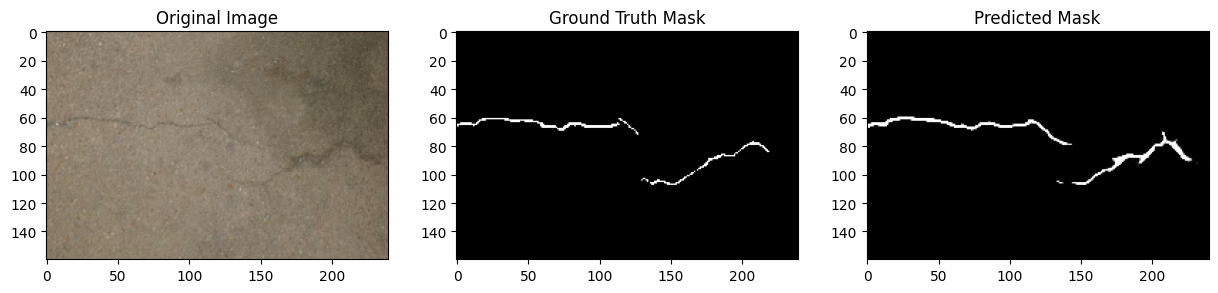

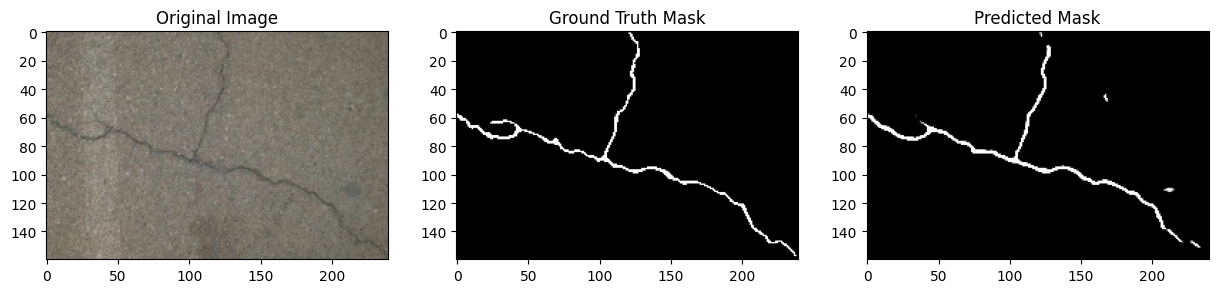

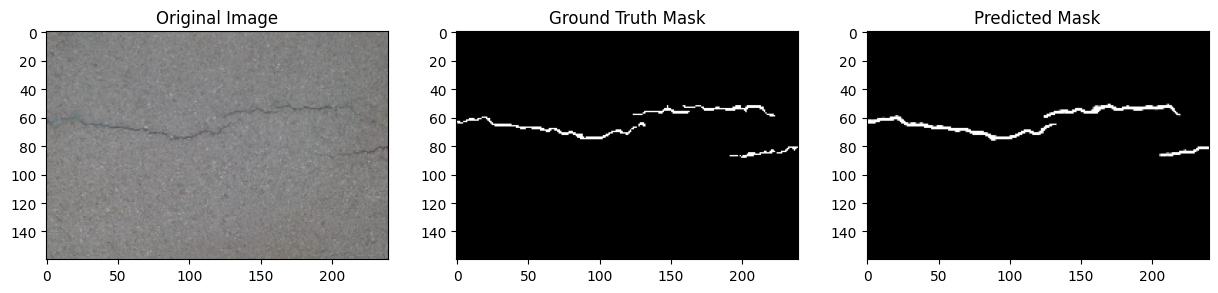

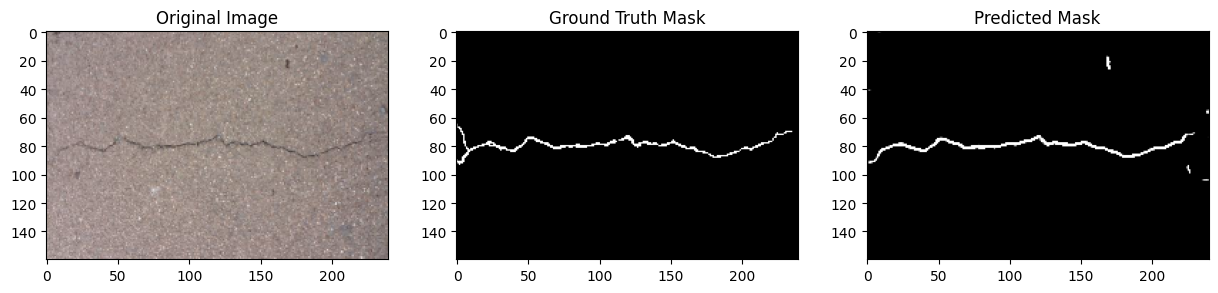

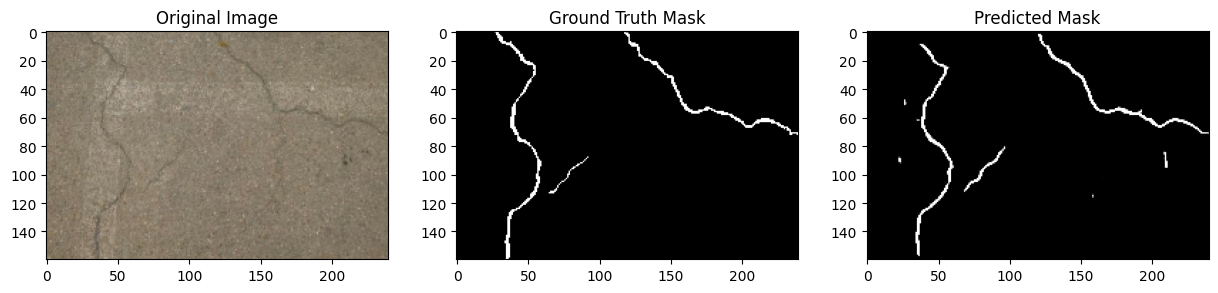

In [24]:
# Binarize the predictions
# predictions = (predictions > 0.5).astype(np.uint8)

# Visualize results for a few test images
num_samples_to_visualize = min(5, len(test_originals))

for i in range(num_samples_to_visualize):
    # Original Image
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_originals[i])
    plt.title('Original Image')

    # Ground Truth Mask
    plt.subplot(1, 3, 2)
    plt.imshow(test_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')

    # Predicted Mask
    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i], cmap='gray')
    plt.title('Predicted Mask')

    plt.show()

In [27]:
model.save_weights('crack_segmentation.h5')